In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

from scipy.stats import f_oneway

In [2]:
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [3]:
pd.options.display.max_info_columns = 200
pd.options.display.max_columns = 30
pd.options.display.max_rows = 200

# Food Contents Health Indicators
## Author: Mihail Kalachev

### Abstract

In this paper I examine the Open Food Facts public database related to food product contents in different countries. I follow the OSEMN process while trying to relate the information that I have to a number of human body health indicators like Body Mass Index, Blood Cholesterol levels, Systolic Blood pressure and Sugar consumed per day. The information about those health indicators is taken from Gapminder data collection foundation. The main question that I am trying to answer is:

#### Is there a correlation between food products' content in different countries and the individual health of people living in those countries?

### Obtain, Scrub and Explore Open Food Facts dataset

Let's first obtain the Open Food Facts dataset (it is quite large so it takes some time to load) and get a glimpse of the first couple of rows. Also let us see how many rows and columns we have.

In [4]:
food_data = pd.read_table("en.openfoodfacts.org.products.tsv", low_memory=False)

In [5]:
food_data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,...,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
food_data.shape

(356027, 163)

We seem to have a huge number of rows and columns and we certainly cannot work with the whole data. We need to pick a bunch of meaningful columns that will help in our research. Let's see what columns we have and how much data they contain.

In [7]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 163 columns):
code                                          356001 non-null object
url                                           356001 non-null object
creator                                       356024 non-null object
created_t                                     356024 non-null object
created_datetime                              356017 non-null object
last_modified_t                               356027 non-null object
last_modified_datetime                        356027 non-null object
product_name                                  338515 non-null object
generic_name                                  57714 non-null object
quantity                                      119285 non-null object
packaging                                     89959 non-null object
packaging_tags                                89959 non-null object
brands                                        326977 non-null o

A lot of the columns seem mostly empty which is definitely not good. Much of the information in this dataset is actually missing. Let's take some of the columns that have more data in them and seem relevant to our research.

In [8]:
food_data = food_data[["product_name", "brands", "countries_en", "ingredients_text", "serving_size", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n", "energy_100g", "fat_100g", "saturated-fat_100g", "trans-fat_100g", "cholesterol_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g", "nutrition-score-fr_100g", "nutrition-score-uk_100g"]]

In [9]:
food_data.head(5)

,product_name,brands,countries_en,ingredients_text,serving_size,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,Peanuts,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0.0,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,Organic Polenta,Bob's Red Mill,United States,Organic polenta,35 g (0.25 cup),0.0,0.0,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


That looks better. Now we want to make conclusions based on which country the product is sold in. So the rows without country information are useless to us. Plus they are less than 300. Let's drop them.

In [10]:
food_data = food_data[food_data["countries_en"].notna()]

So far so good. Now we want to check how many products exist for each of the presented countries.

In [11]:
food_data.groupby("countries_en").size().sort_values(ascending = False)

countries_en
United States                                                                                                           173159
France                                                                                                                  123961
Switzerland                                                                                                              14932
Germany                                                                                                                   8470
Spain                                                                                                                     5529
United Kingdom                                                                                                            5092
Belgium                                                                                                                   2936
Australia                                                                                         

Things are getting from bad to worse. We seem to have a huge discrepancy among the represented countries. The country with the most products is United States with 173159 products, followed by France with 123961 and Switzerland with 14932. The fourth most represented country has below 10000 rows, one order of magnitude less than the first one. We, Data Scientists, hate this kind of data skewness.

The worse thing is that we have products which are sold in more than one country and those countries are listed with "," symbol in the column. So we cannot easily extract that information. But if we omit these products, we might be missing a lot of statistically significant data, especially when we have countries with such weak representation. We need to find a way to get those records. To do so, we create a function which by given dataframe and country, returns the index of all records which contain this country in the "countries_en" field.

In [12]:
def get_country_idx(dataframe, country):
    '''
    Get records by country name.
    Returns a boolean index list.
    
    dataframe : pandas.core.frame.DataFrame
    country : string
    '''
    
    return dataframe["countries_en"].str.contains("(^|,)" + country + "($|,)")

Check the function for correctness

In [13]:
food_data[get_country_idx(food_data, "Bulgaria")].head(3)

,product_name,brands,countries_en,ingredients_text,serving_size,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
115806,Multivitamine,Centrum adults,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129665,Elite Gourmet 6 layer high protein bar,Dymatize,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179375,Peach Nectar with Peach Pulp,Solevita,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check how many products Switzerland has, based on our function

In [14]:
food_data[get_country_idx(food_data, "Switzerland")].shape[0]

17204

Great news! We managed to squeeze out ~2300 more products for Switzerland.

Now that we have a reliable way to get country products, we need to identify the top countries by product count. We will need this information later on to examine only countries with statistically significant product representation.

For this purpuse we take the top 20 entries in column `countries_en` sorted by product count, split them by the "," symbol, count the products for each individual country in those lists and put the numbers in a dictionary for later use.

In [15]:
top_countries_index = food_data.groupby("countries_en").size().sort_values(ascending = False).head(20).index

In [16]:
top_countries_dict = {}
for country_row in top_countries_index.str.split(","):
    for country in country_row:
        if country not in top_countries_dict:
            # sum here returns the count of "True" values in the index
            top_countries_dict[country] = sum(get_country_idx(food_data, country))

In [17]:
top_countries_dict

{'United States': 173708,
 'France': 129320,
 'Switzerland': 17204,
 'Germany': 9403,
 'Spain': 6061,
 'United Kingdom': 5987,
 'Belgium': 4088,
 'Australia': 2319,
 'Russia': 1641,
 'Italy': 1632,
 'Canada': 1070,
 'Portugal': 920,
 'Netherlands': 807,
 'Austria': 472,
 'Czech Republic': 441,
 'Brazil': 365,
 'Sweden': 416}

We will pick the countries for our research later on. For now this is enough.

### EDA on Open Food Facts dataset

Let's now explore the data in the dataset to see if we can get any information relevant to our research. We start by examining the sugar contents of products in the United States only, since this is the best represented country. We can show the data distribution in a histogram.

In [18]:
sugars_usa = food_data[get_country_idx(food_data, "United States")]["sugars_100g"].dropna()

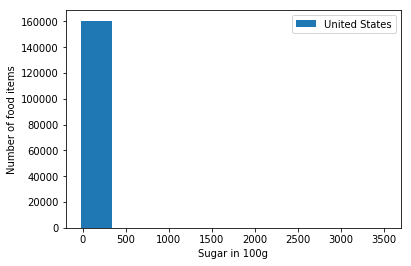

In [19]:
plt.hist(sugars_usa, label = "United States")
plt.xlabel("Sugar in 100g")
plt.ylabel("Number of food items")
plt.legend()
plt.show()

What? Not the best looking "histogram". And why does our X-axis reach 3500g of sugar in 100g?

In [20]:
food_data[food_data["sugars_100g"] > 100].sort_values(by = "sugars_100g", ascending = False)

,product_name,brands,countries_en,ingredients_text,serving_size,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
347260,"Nusco, Chocolate Spread, Chocolate",Brinkers,United States,"Sugar, vegetable oils, (rapeseed, palm), low f...",1 g (1 g),0.0,0.0,231199.0,NaN,550.000,NaN,NaN,NaN,3520.00,5380.0,430.000,0.01016,0.004000,25.0,25.0
157495,"Tamarind Juice With Nata De Coco, Tamarind",Kelly Jelly,United States,Tamarind juice 10% sugar 10% nata de coco 20% ...,1.2 g (1.2 g),0.0,0.0,NaN,0.000,NaN,NaN,NaN,2916.67,166.67,250.0,NaN,147.32000,58.000000,NaN,NaN
209928,Brioche Tranchée,Harry's,France,"Farine de _blé_ 53%, eau, sucre, _œufs_ frais ...",27 g,0.0,1.0,1524.0,13.000,5.600,NaN,NaN,53.90,145.00,1.2,7.500,1.10000,0.433071,22.0,22.0
112519,Tomato Ketchup,Heinz,United States,"Tomato concentrate from red ripe tomatoes, dis...",17 g,0.0,0.0,2510.0,0.588,0.588,0.0,0.0,136.00,134.00,0.0,7.060,0.01060,0.004170,17.0,17.0
135091,Mango Jalapeno,California Flavored Nuts,United States,"Mangoes, sulfur dioxide (used as a preservativ...",28 g (1 oz),0.0,0.0,1941.0,0.000,0.000,0.0,NaN,125.00,110.71,7.1,NaN,NaN,NaN,NaN,NaN
256837,Sirop d'agave,Carrefour Bio,France,Sirop d'agave concentré issu de l'agriculture ...,20 ml,0.0,0.0,1785.0,NaN,NaN,NaN,NaN,105.00,105.00,NaN,NaN,NaN,NaN,NaN,NaN
210260,Sirop d'Agave brun bio,Bjorg,France,100% sirop d'agave.,100 ml,0.0,0.0,1760.0,0.000,0.000,NaN,NaN,104.00,104.00,0.0,0.000,0.14000,0.055100,15.0,15.0
284493,Agave Syrup dark,Allos,Germany,konzentrierter Agavensaft,NaN,0.0,0.0,1760.0,1.000,1.000,NaN,NaN,103.50,103.50,NaN,1.000,0.10000,0.039370,15.0,15.0
284494,Sirop d agave pur,Allos,France,NaN,NaN,NaN,NaN,1760.0,1.000,0.100,NaN,NaN,103.50,103.50,NaN,1.000,0.10000,0.039370,15.0,15.0
284509,Agavendicksaft,Allos,Germany,Konzentrierter Agavensaft.,NaN,0.0,0.0,1760.0,1.000,0.100,NaN,NaN,103.50,103.50,NaN,1.000,0.10000,0.039370,15.0,15.0


We have one entry with very high incorrect sugar content and a couple more with incorrect content of more than 100g. Most of the products seem to be Agave syrup, which has around 70 / 100g sugar. Let's update those records to 70.

In [21]:
food_data.loc[food_data["sugars_100g"] > 100, "sugars_100g"] = 70

Are there any entries where sugar contents is below zero?

In [22]:
food_data[food_data["sugars_100g"] < 0]

,product_name,brands,countries_en,ingredients_text,serving_size,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
8642,Grade A Fancy Chopped Spinach,Spartan,United States,Spinach.,83 g (0.25 cup),0.0,0.0,151.0,0.00,0.00,0.0,0.000,3.61,-1.20,1.2,2.41,0.38354,0.151000,-1.0,-1.0
18347,"Select, Spicy Red Bell Pepper Pasta Sauce",Signature,United States,"Tomatoes (diced tomatoes and tomato paste), wa...",125 g (0.5 cup),0.0,0.0,167.0,0.80,0.00,0.0,0.000,7.20,-0.80,0.8,0.80,0.87376,0.344000,2.0,2.0
119086,"Hummous, Black Truffle",The Wild Pea,United States,"Chickpeas (garbanzo beans, water, salt), fresh...",28 g (1 oz),0.0,0.0,598.0,3.57,0.00,0.0,0.000,21.43,-3.57,3.6,7.14,0.95250,0.375000,-4.0,-4.0
147915,Crackers,Partners A Tasteful Choice Company,United States,"Buttermilk (cultured 1% milk, salt. sodium cit...",15 g (15 g),0.0,0.0,1674.0,13.33,3.33,0.0,0.033,66.67,-6.67,6.7,NaN,2.03200,0.800000,NaN,NaN
152522,"Italianavera, Tomato Sauce With Gaeta Olives &...",Italiana Vera Srl,United States,"Diced tomato (83%), gaeta pitted black olives ...",80 g (80 g),0.0,0.0,326.0,6.25,1.25,0.0,0.000,5.00,-6.25,1.2,1.25,1.19380,0.470000,4.0,4.0
165746,Organic Pumpkin Seeds,Cb's Nuts,United States,"Fresh roasted organic pumpkin seeds, sea salt.",28 g (1 oz),0.0,0.0,255.0,21.43,3.57,0.0,0.000,53.57,-17.86,17.9,17.86,1.93294,0.761000,-2.0,-2.0
201941,Caprice des dieux,Caprice des Dieux,France,"_Lait_ de vache, _crème_, sel, ferments lactiq...",NaN,0.0,0.0,1379.0,30.00,21.00,NaN,NaN,0.80,-0.10,NaN,15.30,1.40000,0.551181,15.0,20.0


Based on those records, it looks to me like somebody entered a `-` symbol before the actual value and this got interpreted as a "minus". Let's update those records by taking their absolute value.

In [23]:
food_data.loc[food_data["sugars_100g"] < 0, "sugars_100g"] = abs(food_data.loc[food_data["sugars_100g"] < 0, "sugars_100g"])

Now let's draw our histogram again

In [24]:
sugars_usa = food_data[get_country_idx(food_data, "United States")]["sugars_100g"].dropna()

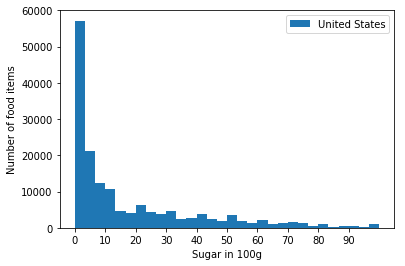

In [25]:
plt.hist(sugars_usa, bins=30, label = "United States")
plt.xticks(range(0, 100, 10))
plt.xlabel("Sugar in 100g")
plt.ylabel("Number of food items")
plt.legend()
plt.show()

Much better. We can make several observations:

1. Most of the data is in the first bins. This is normal. Most products have less than 10g of sugar per 100g.
2. There are small "peaks" at each of the round 2-digit numbers. This is probably caused by approximation which was used when the data was entered. Instead of 23.5g of sugar, contributers probably just entered 20g.

Now let's add France into the picture, which is the second best represented country.

In [26]:
sugars_france = food_data[get_country_idx(food_data, "France")]["sugars_100g"].dropna()

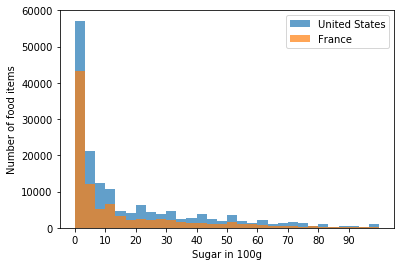

In [27]:
plt.hist(sugars_usa, bins=30, label="United States", alpha = 0.7)
plt.hist(sugars_france, bins=30, label="France", alpha = 0.7)
plt.xticks(range(0, 100, 10))
plt.xlabel("Sugar in 100g")
plt.ylabel("Number of food items")
plt.legend()
plt.show()

The histogram looks normal. We need to find out if there is a significant difference between the average sugar contents in products sold in the United States and in France. We want to find such a difference, because if it exists, we can base our further research about people health indicators on the different product contents in different countries.

It kind of looks like in most bins United States' sugar content is dominant, but we cannot be sure by simply looking at the histogram. Let's draw a boxplot.

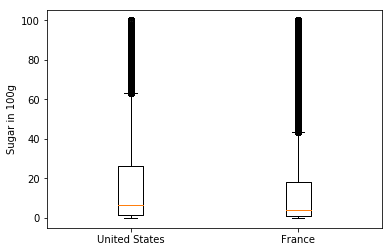

In [28]:
plt.boxplot([sugars_usa, sugars_france], labels = ["United States", "France"])
plt.ylabel("Sugar in 100g")
plt.show()

Again, United States seem to have more sugar in their products, but due to the huge amount of data, and the big number of outliers, we cannot say anything certain here.

Let's print some of the important characteristics of the distributions.

In [29]:
print("\tUnited States\tFrance")
print("Mean:\t" + str(round(sugars_usa.mean(), 2)) + "\t\t" + str(round(sugars_france.mean(), 2)))
print("Std:\t" + str(round(sugars_usa.std(), 2)) + "\t\t" + str(round(sugars_france.std(), 2)))
print("Median:\t" + str(round(sugars_usa.median(), 2)) + "\t\t" + str(round(sugars_france.median(), 2)))

	United States	France
Mean:	17.16		13.42
Std:	21.98		19.15
Median:	6.67		4.1


Now we have something more significant here. Indeed the sugar contents of products seem to differ a lot between France and USA especially based on how many products we have for both countries (the _Law of large numbers_ is working).

To be absolutely certain, let's form a pair of Hypoteses:
1. $H_{0}$ : We don't have anything significant here, the 2 series of data originate from the same distribution.
2. $H_{1}$ : We have something significant, the 2 series of data have different distributions.

Let's test our Hypotheses by running an ANOVA test on the 2 groups

In [30]:
f_oneway(sugars_usa, sugars_france)

F_onewayResult(statistic=1895.967427769092, pvalue=0.0)

A pvalue of **0.0** is confusing. My first thought is that we made the calculations wrong. But after re-checking the data, there seems to be nothing wrong with the calculations. Could it be that the 2 sets of data are so convincingly different from each other based on the abundance of data that we have, that the pvalue is so so small and Python just approximates it to zero?

Let's take a smaller set of the data and perform the test again.

In [31]:
f_oneway(sugars_usa.sample(30000), sugars_france.sample(30000))

F_onewayResult(statistic=539.8859621057463, pvalue=6.706627659011368e-119)

Eureka! Turns out that the **_pvalue_** is so small that Python cannot represent it properly.

So we can confidently reject our $H_{0}$ hypotesis at a very very low **critical confidence level**.

**Conclusion:** We are highly confident that the sugar distribution among products in France and USA is different based on the products represented in our dataset.

Now let's do the same exploration with the fat contents in products. This time we check the data for correctness beforehand.

In [32]:
food_data[food_data["fat_100g"] > 100]

,product_name,brands,countries_en,ingredients_text,serving_size,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
177004,15666666666,NaN,China,NaN,NaN,NaN,NaN,NaN,1.566667e+10,NaN,NaN,NaN,1.566667e+10,NaN,NaN,1.566667e+10,NaN,NaN,NaN,NaN
178692,NaN,"Chirurgie esthétique Tunisie,plastic surgery t...",Tunisia,NaN,NaN,NaN,NaN,500.0,2.000000e+02,100.0,NaN,NaN,1.000000e+01,10.0,10.0,1.500000e+02,20.00,7.874016,18.0,18.0
334384,Ekstra Jomfru Olivenolie,Santagata,Denmark,NaN,NaN,NaN,NaN,3737.0,1.010000e+02,15.0,NaN,NaN,0.000000e+00,0.0,NaN,0.000000e+00,0.00,0.000000,11.0,20.0
336897,Graine de couscous moyen,La méditerranéa,France,NaN,NaN,NaN,NaN,1482.0,1.050000e+02,0.3,NaN,NaN,7.000000e+01,2.5,NaN,1.200000e+01,0.01,0.003937,-1.0,-1.0


2 of the products here are not food products at all. The other two have incorrect fat data. We drop the 2 non-food products and correct the values for the other 2 products.

In [33]:
food_data = food_data.drop(index=[177004,178692])
food_data.loc[334384, "fat_100g"] = 100
food_data.loc[336897, "fat_100g"] = 70

Check for food products with negative fat content.

In [34]:
food_data[food_data["fat_100g"] < 0]

,product_name,brands,countries_en,ingredients_text,serving_size,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


Get the fat data for France and USA in 2 series and plot their distribution

In [35]:
fats_usa = food_data[get_country_idx(food_data, "United States")]["fat_100g"].dropna()
fats_france = food_data[get_country_idx(food_data, "France")]["fat_100g"].dropna()

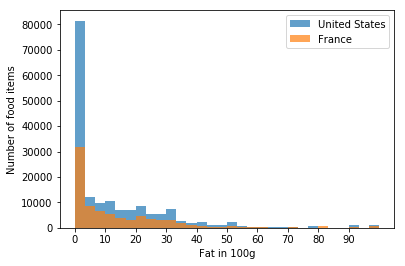

In [36]:
plt.hist(fats_usa, bins=30, label="United States", alpha = 0.7)
plt.hist(fats_france, bins=30, label="France", alpha = 0.7)
plt.xticks(range(0, 100, 10))
plt.xlabel("Fat in 100g")
plt.ylabel("Number of food items")
plt.legend()
plt.show()

This does not look good. Although most products from USA seem to have higher fat content than those from France, there are a lot of products with fat content close to 0 for USA. This may significantly reduce the distribution mean for fat in products from USA and lead us to wrong conclusions.

Let us check how much data we have for both countries

In [37]:
len(fats_usa)

171713

In [38]:
len(fats_france)

81233

There are a lot of missing values for products from France regarding fat contents. Unfortunately we cannot do anything about this, because we cannot manually fix so many missing data entries. We may replace the missing values with the column mean, but this will not really help us in our investigation and will cause a strange histogram distribution so we choose not to take them into account.

Now let's see why so many products from USA have fat contents close to 0. How many of them are actually 0? Let's compare them with the data from France

In [39]:
food_data[(get_country_idx(food_data, "United States")) & (food_data["fat_100g"] == 0)].shape[0]

58663

In [40]:
food_data[(get_country_idx(food_data, "France")) & (food_data["fat_100g"] == 0)].shape[0]

7489

Indeed the difference is huge. Can we spot somthing wrong for the products from USA? Maybe 0 is an incorrect value. Let us check.

In [41]:
food_data[get_country_idx(food_data, "United States") & (food_data["fat_100g"] == 0)].sample(200)

,product_name,brands,countries_en,ingredients_text,serving_size,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
104504,Chocolate Fat Free Milk,Target Stores,United States,"Nonfat milk, high fructose corn syrup, cocoa (...",236 ml (1 cup),0.0,0.0,268.0,0.0,0.0,0.0,0.00200,11.86,11.02,0.000,3.39,0.24638,0.097,1.0,1.0
16264,"All Natural Salsa, Mild",Newman's Own,United States,"All natural ingredients: diced tomatoes, tomat...",32 g (2 Tbsp),0.0,0.0,130.0,0.0,0.0,0.0,0.00000,9.38,3.12,3.100,0.00,0.51562,0.203,-2.0,-2.0
72977,Chicago Style Relish,Vienna,United States,"Ingredients: cucumbers, water, vinegar, high f...",15 g (1 Tbsp),0.0,0.0,418.0,0.0,NaN,NaN,NaN,26.67,26.67,NaN,0.00,2.36982,0.933,NaN,NaN
164436,"Hal's New York, Carbonated Seltzer Water, Blac...",Hal's Beverage Llc,United States,Filtered carbonated water and natural flavors.,240 ml (8 fl oz),0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.00000,0.000,NaN,NaN
141446,"Puro, Nectar, Mango",Rol Rom Foods,United States,Filtered water - minimum 35% natural mango pul...,200 ml (200 ml),0.0,0.0,293.0,0.0,NaN,NaN,NaN,17.50,14.50,NaN,0.00,0.03048,0.012,NaN,NaN
15887,"Fischer & Wiser, Handcrafted One Jar At A Time...",Fischer & Wieser Specialty Foods Inc.,United States,"Sugar, distilled vinegar, stoneground mustard ...",20 g (1 Tbsp),0.0,0.0,732.0,0.0,NaN,NaN,NaN,40.00,40.00,NaN,0.00,0.44450,0.175,NaN,NaN
42720,White Rice,"Hannaford, Hannaford Bros. Co.",United States,"Enriched precooked long grain rice (rice, niac...",59 g (1 CUP PREPARED | MAKES ABOUT),0.0,0.0,1490.0,0.0,0.0,0.0,0.00000,83.05,0.00,1.700,6.78,0.00000,0.000,-2.0,-2.0
63419,Golden Honey,Bramley's,United States,Honey,21 g (1 Tbsp),0.0,0.0,1197.0,0.0,NaN,NaN,NaN,80.95,80.95,NaN,0.00,0.00000,0.000,NaN,NaN
43926,100% Extra Virgin Olive Oil,Essential Everyday,United States,"Extra virgin olive oil*, soy lecithin, dimethy...",0.25 g (0.25 g),0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00,0.00,0.000,0.00,0.00000,0.000,0.0,0.0
21099,Bold Stock Tender Beef,"College Inn, Del Monte Foods Inc.",United States,"Beef stock, contains less than 2% of the follo...",240 ml (1 cup),0.0,0.0,50.0,0.0,NaN,NaN,NaN,0.42,NaN,NaN,2.50,0.79248,0.312,NaN,NaN


There doesn't seem to be anything wrong. Most of those products are fruit nectars and all kind of sugar delights which indeed have 0 or close to 0 fat content in them. We cannot touch this data. We don't have enough information to do so and have to work with what we have.

Now, as we did before, let us draw a boxplot of the fat data distribution and print the distribution characteristics.

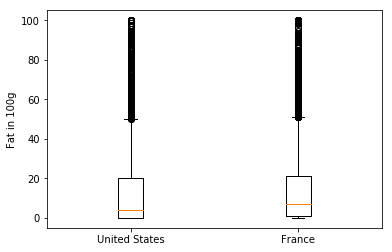

In [42]:
plt.boxplot([fats_usa, fats_france], labels = ["United States", "France"])
plt.ylabel("Fat in 100g")
plt.show()

In [43]:
print("\tUnited States\tFrance")
print("Mean:\t" + str(round(fats_usa.mean(), 2)) + "\t\t" + str(round(fats_france.mean(), 2)))
print("Std:\t" + str(round(fats_usa.std(), 2)) + "\t\t" + str(round(fats_france.std(), 2)))
print("Median:\t" + str(round(fats_usa.median(), 2)) + "\t\t" + str(round(fats_france.median(), 2)))

	United States	France
Mean:	12.4		13.31
Std:	17.59		17.14
Median:	4.23		6.8


Indeed it looks like France has more products with higher fat content. We cannot be sure if this is true or it is a result of missing data, but we have to rely on the data that we have.

Let us form again a pair of hypoteses $H_{0}$ and $H_{1}$ and perform hypothesis testing using the ANOVA test.

In [44]:
f_oneway(fats_usa, fats_france)

F_onewayResult(statistic=147.8353983444527, pvalue=5.267643390091269e-34)

We can reject the $H_0$ hypothesis with very high certainty and confirm the $H_1$ hypothesis that the data distributions are different.

Now let's add Switzerland into the equation. It is the third most represented country. Why do we do that? We want to make sure that each country has a different data distribution of the main food macronutrients. If the distributions are indeed different, later on we may try to draw conclusions about how the different food contents of products sold in different countries influences our health. If the distributions are the same or close to each other, it will be really hard to draw any conclusions.

We will just test the sugar distribution now. 

In [45]:
sugars_swiss = food_data[get_country_idx(food_data, "Switzerland")]["sugars_100g"].dropna()

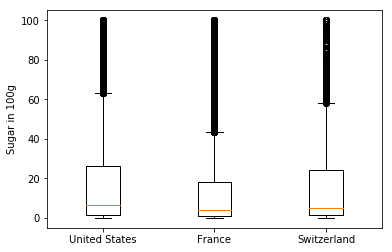

In [46]:
plt.boxplot([sugars_usa, sugars_france, sugars_swiss], labels = ["United States", "France", "Switzerland"])
plt.ylabel("Sugar in 100g")
plt.show()

In [47]:
print("Mean sugar 100g USA: " + str(round(sugars_usa.mean(), 2)))
print("Mean sugar 100g France: " + str(round(sugars_france.mean(), 2)))
print("Mean sugar 100g Switzerland: " + str(round(sugars_swiss.mean(), 2)))

Mean sugar 100g USA: 17.16
Mean sugar 100g France: 13.42
Mean sugar 100g Switzerland: 15.72


Looks like the 3 distributions are different from each other. Switzerland's sugar mean content falls between those of France and USA. Let's test this with another ANOVA test this time we do it for 3 groups of data.

In [48]:
f_oneway(sugars_usa.sample(30000), sugars_france.sample(30000), sugars_swiss)

F_onewayResult(statistic=232.2749205114714, pvalue=2.8104610102812608e-101)

We can safely reject our $H_0$ hypothesis and accept the $H_1$ one that the 3 series of data originate from 3 different distrubutions.

### Data preparation for modelling on Open Food Facts dataset

We do not want to explore only sugar and fat contents for different countries. We want to explore all available food content indicators, aggregate this information by country and compare it to different human body health indicators. The best way to aggregate this data for our purpose is to take the `mean` values by country of each food content indicator. Then we want to add this data to a pandas DataFrame for further analysis.

But first we need to clean the obviously wrong values some more. I will not go into detail how and why I chose to clean this data like this, but I have examined each of those columns manually and this is the best possible way that I could think of to clean up the mess. **I only touch extreme impossible values which are obviously wrong**. All the other information, even if wrong, cannot be modified, because that would mean changing the data the way we like it.

In [49]:
food_data.loc[food_data["energy_100g"] > 10000, "energy_100g"] = food_data.loc[food_data["energy_100g"] > 10000, "energy_100g"] / 100
food_data.loc[food_data["energy_100g"] > 4000, "energy_100g"] = 4000
food_data.loc[food_data["saturated-fat_100g"] > 100, "saturated-fat_100g"] = food_data.loc[food_data["saturated-fat_100g"] > 100, "saturated-fat_100g"] / 100
food_data.loc[food_data["trans-fat_100g"] < 0, "trans-fat_100g"] = abs(food_data.loc[food_data["trans-fat_100g"] < 0, "trans-fat_100g"])
food_data.loc[food_data["trans-fat_100g"] > 100, "trans-fat_100g"] = food_data.loc[food_data["trans-fat_100g"] > 100, "trans-fat_100g"] / 100
food_data.loc[food_data["carbohydrates_100g"] > 100, "carbohydrates_100g"] = 70
# non-food products:
food_data = food_data.drop(index=[298200,347260])
food_data.loc[food_data["fiber_100g"] < 0, "fiber_100g"] = abs(food_data.loc[food_data["fiber_100g"] < 0, "fiber_100g"])
food_data.loc[food_data["fiber_100g"] > 50, "fiber_100g"] = 20
food_data.loc[food_data["proteins_100g"] < -100, "proteins_100g"] = 0
food_data.loc[food_data["proteins_100g"] < 0, "proteins_100g"] = abs(food_data.loc[food_data["proteins_100g"] < 0, "proteins_100g"])
food_data.loc[food_data["proteins_100g"] > 100, "proteins_100g"] = 8
food_data.loc[(food_data["salt_100g"] > 100) & (food_data["product_name"].str.contains("Salt", na=False)), "sodium_100g"] = 40
food_data.loc[(food_data["salt_100g"] > 100) & (food_data["product_name"].str.contains("Salt", na=False)), "salt_100g"] = 100
food_data.loc[(food_data["salt_100g"] > 100), "sodium_100g"] = 6
food_data.loc[(food_data["salt_100g"] > 100), "salt_100g"] = 15

Here comes the interesting part. We need to perform thresholding on the list of countries and only take the countries which have enough products listed. The question is "how much is *"enough*" ? "

I have run the notebook from here till the end with all kinds of values for this threshold, you can do the same if you like. What I found is the following:
1. If we set the threshold too low, we take countries which have very few products and they are not diverse enough which is not representative of the food product choice for the given country. As a result we have very messy data at the end with no correlations, which is incorrect.
2. If we set the threshold too high, we take only a couple of well-represented countries and the data is mostly correct, but at the end the data is so scarce that we find correlations that are not existing (you can always say there is a trend if you see a scatter plot with 2 points, but this will be totally wrong statistically speaking).

My experiments showed that the optimum value in this dataset, are countries with more than 2000 products. So let's use this value.

In [50]:
threshold_value = 2000

From our list of "top countries", let's see which countries will "make it" and which ones will fall below the threshold.

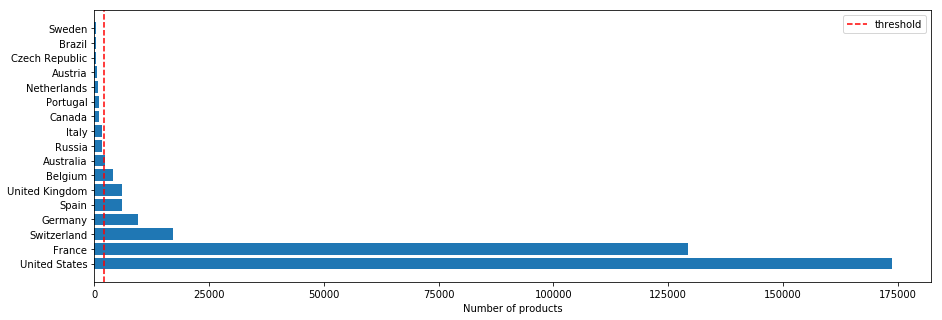

In [51]:
plt.figure(figsize=(15,5))
plt.barh(y = list(top_countries_dict.keys()), width=list(top_countries_dict.values()))
plt.axvline(x=threshold_value, linestyle="dashed", color="red", label="threshold")
plt.xlabel("Number of products")
plt.legend()
plt.show()

Let's zoom in a little to get a better view.

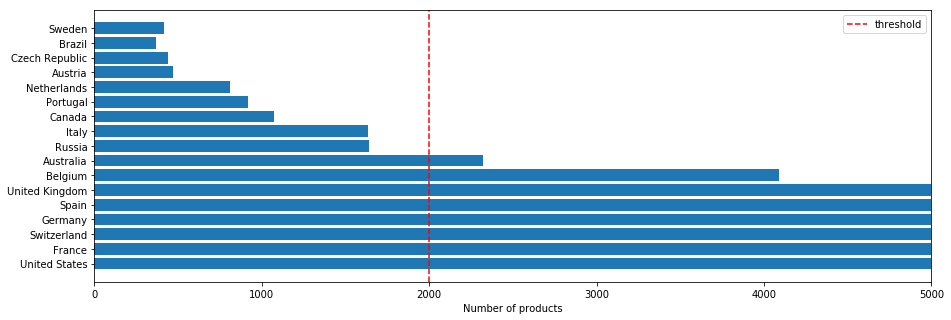

In [52]:
plt.figure(figsize=(15,5))
plt.barh(y = list(top_countries_dict.keys()), width=list(top_countries_dict.values()))
plt.axvline(x=threshold_value, linestyle="dashed", color="red", label="threshold")
plt.xlim(0, 5000)
plt.xlabel("Number of products")
plt.legend()
plt.show()

So we have United States, France, Switzerland, Germany, Spain, United Kingdom, Belguim and Australia. This is not much. Let's see what we can do with this data.

The following function will extract the column means for us, by given country and a DataFrame.

In [53]:
def get_country_mean_list(columns, dataset, country):
    '''
    Given a country and columns list, extract
    the mean value for each column from the list
    from the given dataset. Put the values in a new list.
    Returns the new list.
    
    columns : python list
        List the columns for which to calculate mean values.
        The column names should match those from dataset
    dataset : pandas.core.frame.DataFrame
        The DataFrame from which to calculate column means.
    country: string
        The country for which to do the calculations
    '''
    country_mean_list = [country]
    for column in columns:
        country_mean_list.append(dataset[column].dropna().mean())
    return country_mean_list

We want to get the means of all food product nutrients so we take those columns from the original dataset **only for the countries that passed the thresholding process**

In [54]:
# columns with nutrients. We do not need the rest from the original dataset
interesting_columns = ["energy_100g", "fat_100g", "saturated-fat_100g", "trans-fat_100g", "cholesterol_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g"]
countries_mean_list = []

for country in top_countries_dict.keys():
    # if the country is eligible based on the threshold
    if top_countries_dict[country] > threshold_value:
        countries_mean_list.append(get_country_mean_list(interesting_columns, food_data[get_country_idx(food_data, country)], country))

Now that we have all the data that we need, we create a DataFrame, which will have the country as an index and the features will be the mean value of each nutrient column for the given country.

In [55]:
countries_mean_dataset = pd.DataFrame(countries_mean_list,
                                      columns=["country", "mean_energy_100g", "mean_fat_100g", "mean_saturated_fat_100g", "mean_trans_fat_100g", "mean_cholesterol_100g", "mean_carbohydrates_100g", "mean_sugars_100g", "mean_fiber_100g", "mean_proteins_100g", "mean_salt_100g", "mean_sodium_100g"]
                                     )
countries_mean_dataset = countries_mean_dataset.set_index("country")

In [56]:
countries_mean_dataset

,mean_energy_100g,mean_fat_100g,mean_saturated_fat_100g,mean_trans_fat_100g,mean_cholesterol_100g,mean_carbohydrates_100g,mean_sugars_100g,mean_fiber_100g,mean_proteins_100g,mean_salt_100g,mean_sodium_100g
country,,,,,,,,,,,
United States,1130.179348,12.404653,4.909362,0.066629,0.020036,33.741253,17.161427,2.892639,6.812551,1.866898,0.735396
France,1113.848829,13.308294,5.224303,0.186608,0.036431,27.711719,13.422326,2.625816,7.777264,1.162205,0.457580
Switzerland,1137.993508,13.484245,5.812447,0.043429,0.019626,30.297410,15.724807,2.606938,6.996231,1.072547,0.423748
Germany,1201.543617,15.788123,6.973898,0.108333,0.011857,27.744703,14.886813,4.220346,8.489907,1.027423,0.404496
Spain,1066.593049,13.135817,4.079485,0.028000,0.000313,27.683377,12.705551,4.030199,6.035124,0.990524,0.389971
United Kingdom,1116.132351,13.884962,5.762971,0.265074,0.009966,27.784613,15.162423,2.256273,7.381569,0.852334,0.335888
Belgium,1188.697535,14.299277,5.664567,0.220824,0.031942,32.095265,15.793274,3.200231,6.343477,1.070232,0.421346
Australia,1005.203893,11.377627,5.029165,0.173359,0.006867,27.824499,15.248357,3.751943,6.584084,1.158848,0.456385


We can print the correlation matrix

In [57]:
countries_mean_dataset.corr()

,mean_energy_100g,mean_fat_100g,mean_saturated_fat_100g,mean_trans_fat_100g,mean_cholesterol_100g,mean_carbohydrates_100g,mean_sugars_100g,mean_fiber_100g,mean_proteins_100g,mean_salt_100g,mean_sodium_100g
mean_energy_100g,1.000000,0.856229,0.701403,0.048312,0.483834,0.376002,0.296999,-0.096808,0.471762,-0.007351,-0.007120
mean_fat_100g,0.856229,1.000000,0.752277,0.102890,0.159337,-0.125045,-0.104018,0.143729,0.592098,-0.432013,-0.432393
mean_saturated_fat_100g,0.701403,0.752277,1.000000,0.273133,0.208180,-0.075949,0.307408,-0.006967,0.774477,-0.276683,-0.276040
mean_trans_fat_100g,0.048312,0.102890,0.273133,1.000000,0.323470,-0.187930,0.060163,-0.385830,0.189920,-0.353010,-0.354512
mean_cholesterol_100g,0.483834,0.159337,0.208180,0.323470,1.000000,0.419552,0.205110,-0.502767,0.210033,0.237971,0.238027
mean_carbohydrates_100g,0.376002,-0.125045,-0.075949,-0.187930,0.419552,1.000000,0.777676,-0.274021,-0.343874,0.727607,0.728548
mean_sugars_100g,0.296999,-0.104018,0.307408,0.060163,0.205110,0.777676,1.000000,-0.312613,-0.019917,0.582521,0.584007
mean_fiber_100g,-0.096808,0.143729,-0.006967,-0.385830,-0.502767,-0.274021,-0.312613,1.000000,-0.062665,-0.098285,-0.100268
mean_proteins_100g,0.471762,0.592098,0.774477,0.189920,0.210033,-0.343874,-0.019917,-0.062665,1.000000,-0.126848,-0.126994
mean_salt_100g,-0.007351,-0.432013,-0.276683,-0.353010,0.237971,0.727607,0.582521,-0.098285,-0.126848,1.000000,0.999991


From this matrix we can make several observations. For example the fat content in a food product is somewhat correlated with the energy in this product, which can be explained with the fact that 1g of fat corresponds to 9kcal of energy, while 1g of carbohydrates or protein corresponds to only 4kcal of energy. Another very strong correlation is between sodium and salt, which is also normal having in mind that most salt in foods is in fact Sodium chloride. However these observations are just for fun and do not bring us any closer to the answer of our main question so let's get back on track.

### Preparing the datasets with human health indicators

Now that we have a tidy dataset with food product information, let's try to correlate it with information from other datasets with human health indicators. I have taken 7 datasets containing information about Body Mass Index, Systolic Blood Pressure and Blood cholesterol levels in both men and women as well as sugar consumption from most world countries. Those datasets are taken from Gapminder which is a kind of data collection foundation.

Those datasets are very similar in structure, but need to be tidied up a bit. In order to automate this job, I have created a function which reads a dataset and tidies it up. 

In [58]:
def read_transform_dataset(file_name):
    '''
    Read Gapminder dataset and tidy it up in preparation
    for analysis. Returns the new dataset
    
    file_name: string
        The file path or URL address to the dataset
    '''
    dataset = pd.read_excel(file_name)
    if str(dataset.columns[0]).isdigit():
        dataset = dataset.reset_index()
    dataset.columns.values[0] = 'country'
    dataset = dataset.melt(id_vars="country", var_name="year", value_name="measured_value")
    dataset["year"] = dataset["year"].astype(int)
    dataset = dataset.dropna()
    return dataset

Let's use our function to read the datasets in separate variables

In [59]:
# Body mass index
bmi_data_male = read_transform_dataset("Indicator_BMI male ASM.xlsx")
bmi_data_female = read_transform_dataset("Indicator_BMI female ASM.xlsx")

# Systolic blood pressure
sbp_data_male = read_transform_dataset("Indicator_SBP male ASM.xlsx")
sbp_data_female = read_transform_dataset("Indicator_SBP female ASM.xlsx")

# Total cholesterol in blood
tc_data_male = read_transform_dataset("Indicator_TC male ASM.xlsx")
tc_data_female = read_transform_dataset("Indicator_TC female ASM.xlsx")

# Average sugar consumption per day (both men and women)
sugar_data = read_transform_dataset("indicator sugar_consumption.xlsx")

In [60]:
bmi_data_male.head(10)

,country,year,measured_value
0,Afghanistan,1980,21.48678
1,Albania,1980,25.22533
2,Algeria,1980,22.25703
3,Andorra,1980,25.66652
4,Angola,1980,20.94876
5,Antigua and Barbuda,1980,23.31424
6,Argentina,1980,25.37913
7,Armenia,1980,23.82469
8,Australia,1980,24.92729
9,Austria,1980,24.84097


We can see that our first column is always "country", the second column is the "year" when the measurement took place, the third one is the actual measured value. We made all datasets to look like this.

Now there is a lot of useful information in those datasets regarding human health and we can make a lot of conclusions about how our health changes over time, where we see improvement, where it gets worse, how do the different countries differ from each other; we can even try to model the data to predict future changes in our health. But this is out of scope for this research papar, so we are not going to do this.

### Putting it all together

We have done so much. We took the Open Food Facts database, scrubbed it, analyzed it as much as possible and draw some very useful conclusions using visual exploration and Hypothesis testing. Then we prepared the data for modelling. Afterwards we obtained and cleaned the Gapminder health indicator data and also prepared it for modelling.

Now let's put it all together. We need to combine all datasets into one bigger dataset, analyze it and draw our final conclusions.

The following function will append information from our health indicator datasets to the foods dataset that we created.

In [61]:
def append_indicator_information(main_dataset, indicator_dataset, new_column_name, round_years=5):
    '''
    Given 2 datasets, append information from the indicator_dataset to
    the main_dataset as a new column. Round the avarage values to the given number
    of years in the past. Return a new dataset, without modifying the existing ones.
    
    main_dataset: pandas.core.frame.DataFrame
        Main dataset to append the information to
    indicator_dataset: pandas.core.frame.DataFrame
        Secondary dataset to append information from it to the main one
    new_column_name: string
        New column name
    round_years: int
        Round the mean value to that many years in the past
    '''
    
    original_dataset = main_dataset.copy()
    new_column_list = []
    for index, row in original_dataset.iterrows():
        new_column_list.append(indicator_dataset[indicator_dataset["country"] == index].nlargest(round_years, "year")["measured_value"].mean())
    original_dataset[new_column_name] = new_column_list
    return original_dataset

Append the health indicator datasets one by one to the food facts dataset that we created.

In [62]:
countries_mean_dataset = append_indicator_information(countries_mean_dataset, bmi_data_male, "bmi_mean_male", 5)
countries_mean_dataset = append_indicator_information(countries_mean_dataset, bmi_data_female, "bmi_mean_female", 5)
countries_mean_dataset = append_indicator_information(countries_mean_dataset, sbp_data_male, "sbp_mean_male", 5)
countries_mean_dataset = append_indicator_information(countries_mean_dataset, sbp_data_female, "sbp_mean_female", 5)
countries_mean_dataset = append_indicator_information(countries_mean_dataset, tc_data_male, "tc_mean_male", 5)
countries_mean_dataset = append_indicator_information(countries_mean_dataset, tc_data_female, "tc_mean_female", 5)
countries_mean_dataset = append_indicator_information(countries_mean_dataset, sugar_data, "sugar_mean", 5)

In [63]:
countries_mean_dataset

,mean_energy_100g,mean_fat_100g,mean_saturated_fat_100g,mean_trans_fat_100g,mean_cholesterol_100g,mean_carbohydrates_100g,mean_sugars_100g,mean_fiber_100g,mean_proteins_100g,mean_salt_100g,mean_sodium_100g,bmi_mean_male,bmi_mean_female,sbp_mean_male,sbp_mean_female,tc_mean_male,tc_mean_female,sugar_mean
country,,,,,,,,,,,,,,,,,,
United States,1130.179348,12.404653,4.909362,0.066629,0.020036,33.741253,17.161427,2.892639,6.812551,1.866898,0.735396,28.283946,28.163718,123.48394,118.95934,5.128924,5.196016,193.424
France,1113.848829,13.308294,5.224303,0.186608,0.036431,27.711719,13.422326,2.625816,7.777264,1.162205,0.457580,25.729510,24.805908,131.50698,120.93534,5.409601,5.361803,109.590
Switzerland,1137.993508,13.484245,5.812447,0.043429,0.019626,30.297410,15.724807,2.606938,6.996231,1.072547,0.423748,26.086530,24.057938,130.62338,120.26398,5.328180,5.271052,159.998
Germany,1201.543617,15.788123,6.973898,0.108333,0.011857,27.744703,14.886813,4.220346,8.489907,1.027423,0.404496,27.028290,25.677944,133.76726,125.91442,5.613907,5.439645,122.742
Spain,1066.593049,13.135817,4.079485,0.028000,0.000313,27.683377,12.705551,4.030199,6.035124,0.990524,0.389971,27.286454,26.241884,130.31346,122.51496,5.255070,5.143299,92.054
United Kingdom,1116.132351,13.884962,5.762971,0.265074,0.009966,27.784613,15.162423,2.256273,7.381569,0.852334,0.335888,27.203262,26.770942,132.10346,125.32124,5.445268,5.388740,110.138
Belgium,1188.697535,14.299277,5.664567,0.220824,0.031942,32.095265,15.793274,3.200231,6.343477,1.070232,0.421346,26.598404,25.144592,129.14158,122.83360,5.437980,5.366159,153.426
Australia,1005.203893,11.377627,5.029165,0.173359,0.006867,27.824499,15.248357,3.751943,6.584084,1.158848,0.456385,27.352006,26.675862,128.03260,118.43686,5.182341,5.238334,126.030


Let's print the correlation matrix to get a feel of our correlations.

In [64]:
countries_mean_dataset.corr()

,mean_energy_100g,mean_fat_100g,mean_saturated_fat_100g,mean_trans_fat_100g,mean_cholesterol_100g,mean_carbohydrates_100g,mean_sugars_100g,mean_fiber_100g,mean_proteins_100g,mean_salt_100g,mean_sodium_100g,bmi_mean_male,bmi_mean_female,sbp_mean_male,sbp_mean_female,tc_mean_male,tc_mean_female,sugar_mean
mean_energy_100g,1.000000,0.856229,0.701403,0.048312,0.483834,0.376002,0.296999,-0.096808,0.471762,-0.007351,-0.007120,-0.218696,-0.320965,0.278869,0.565553,0.691455,0.633455,0.333607
mean_fat_100g,0.856229,1.000000,0.752277,0.102890,0.159337,-0.125045,-0.104018,0.143729,0.592098,-0.432013,-0.432393,-0.300712,-0.403282,0.688021,0.866275,0.920007,0.735688,-0.159471
mean_saturated_fat_100g,0.701403,0.752277,1.000000,0.273133,0.208180,-0.075949,0.307408,-0.006967,0.774477,-0.276683,-0.276040,-0.267654,-0.346744,0.541634,0.564889,0.798590,0.858410,0.117870
mean_trans_fat_100g,0.048312,0.102890,0.273133,1.000000,0.323470,-0.187930,0.060163,-0.385830,0.189920,-0.353010,-0.354512,-0.193705,0.005633,0.239433,0.307869,0.378480,0.641546,-0.228901
mean_cholesterol_100g,0.483834,0.159337,0.208180,0.323470,1.000000,0.419552,0.205110,-0.502767,0.210033,0.237971,0.238027,-0.562853,-0.436265,-0.077622,-0.158371,0.217892,0.410090,0.372767
mean_carbohydrates_100g,0.376002,-0.125045,-0.075949,-0.187930,0.419552,1.000000,0.777676,-0.274021,-0.343874,0.727607,0.728548,0.324782,0.235520,-0.754470,-0.384216,-0.376283,-0.235153,0.924613
mean_sugars_100g,0.296999,-0.104018,0.307408,0.060163,0.205110,0.777676,1.000000,-0.312613,-0.019917,0.582521,0.584007,0.416867,0.334941,-0.587852,-0.275814,-0.229204,0.051151,0.902757
mean_fiber_100g,-0.096808,0.143729,-0.006967,-0.385830,-0.502767,-0.274021,-0.312613,1.000000,-0.062665,-0.098285,-0.100268,0.281032,0.104254,0.113122,0.134866,0.067692,-0.173418,-0.283563
mean_proteins_100g,0.471762,0.592098,0.774477,0.189920,0.210033,-0.343874,-0.019917,-0.062665,1.000000,-0.126848,-0.126994,-0.275867,-0.197346,0.565794,0.472247,0.695356,0.757633,-0.133066
mean_salt_100g,-0.007351,-0.432013,-0.276683,-0.353010,0.237971,0.727607,0.582521,-0.098285,-0.126848,1.000000,0.999991,0.525698,0.551115,-0.864901,-0.626976,-0.617784,-0.430898,0.757965


Very pretty, but incredibly difficult to spot anything in so many numbers. We can draw a heat map, but for that many features it will be one pretty colorful blob.

Let's create a function that, given the correlation matrix, will return all correlations above a certain threshold level.

In [65]:
def get_meaningful_correlations(correlation_matrix, threshold_value, first_columns = [], second_columns = []):
    '''
    Use correlation_matrix to extract all correlations above threshold_value
    but only between columns in first_columns and second_columns. If
    first_columns or second_columns is empty, take all columns instead.
    Returns a dictionary.
    
    correlation_matrix: pandas.core.frame.DataFrame
    
    threshold_value: float
    
    first_columns: python list
    
    second_columns: python list
    '''
    correlation_dict = {}
    for first_column, row in correlation_matrix.iterrows():
        for second_column, coefficient in row.iteritems():
            if (coefficient >= threshold_value) or (coefficient <= -threshold_value):
                if (first_column != second_column and 
                        (first_column in first_columns or not first_columns) and
                        (second_column in second_columns or not second_columns) and
                        second_column + " <-> " + first_column not in correlation_dict):
                    
                    correlation_dict[first_column + " <-> " + second_column] = coefficient

    return correlation_dict

We want to show all correlations between food product nutrients and human health indicators. So the first_columns list contains only food product nutrients, while the second_columns list contains health indicators. We want to see all correlations where the coefficient is bigger than 0.8 or smaller than -0.8

In [66]:
final_corr_dict = get_meaningful_correlations(countries_mean_dataset.corr(), 0.8,
                            first_columns=["mean_energy_100g", "mean_fat_100g", "mean_saturated_fat_100g", "mean_trans_fat_100g", "mean_cholesterol_100g", "mean_carbohydrates_100g", "mean_sugars_100g", "mean_fiber_100g", "mean_proteins_100g", "mean_salt_100g", "mean_sodium_100g"],
                            second_columns=["bmi_mean_male", "bmi_mean_female", "sbp_mean_male", "sbp_mean_female", "tc_mean_male", "tc_mean_female", "sugar_mean"])

In [67]:
final_corr_dict

{'mean_fat_100g <-> sbp_mean_female': 0.8662749662866857,
 'mean_fat_100g <-> tc_mean_male': 0.9200071607364159,
 'mean_saturated_fat_100g <-> tc_mean_female': 0.8584100529630843,
 'mean_carbohydrates_100g <-> sugar_mean': 0.9246126605748624,
 'mean_sugars_100g <-> sugar_mean': 0.902757258956911,
 'mean_salt_100g <-> sbp_mean_male': -0.8649013513003057,
 'mean_sodium_100g <-> sbp_mean_male': -0.8649964045927087}

There seem to be some correlations, but we cannot comment on them with certainty until we plot the data behind those numbers.

Let's create a fucntion, which given the correlations dictionary that we created and the original dataset behind the correlation matrix, plots scatter plots of all correlations in the dictionary.

In [68]:
def plot_scatter_plots(corr_dict, dataset):
    '''
    Plot scatter plots of all correlations in corr_dict
    using data from dataset. Create 3 subplots in a row
    for as many rows as needed.
    
    corr_dict: dictionary
        Retunred as a result from get_meaningful_correlations() function
    dataset:  pandas.core.frame.DataFrame
        The original dataset used to create the correlations matrix
    '''
    subplot_total_count = len(corr_dict)
    x_figsize = 15
    y_figsize = (round(subplot_total_count / 3) + 1) * 10

    plt.figure(figsize=(x_figsize,y_figsize))
    
    subplot_number = 0
    
    for key, value in corr_dict.items():
        subplot_number += 1
        plt.subplot(subplot_total_count, 3, subplot_number)
        
        x_axis = key.split(" <-> ")[0]
        y_axis = key.split(" <-> ")[1]
        plt.scatter(dataset[x_axis], dataset[y_axis])
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.title("Correlation: " + str(round(value, 2)))
        
    plt.tight_layout()
    plt.show()

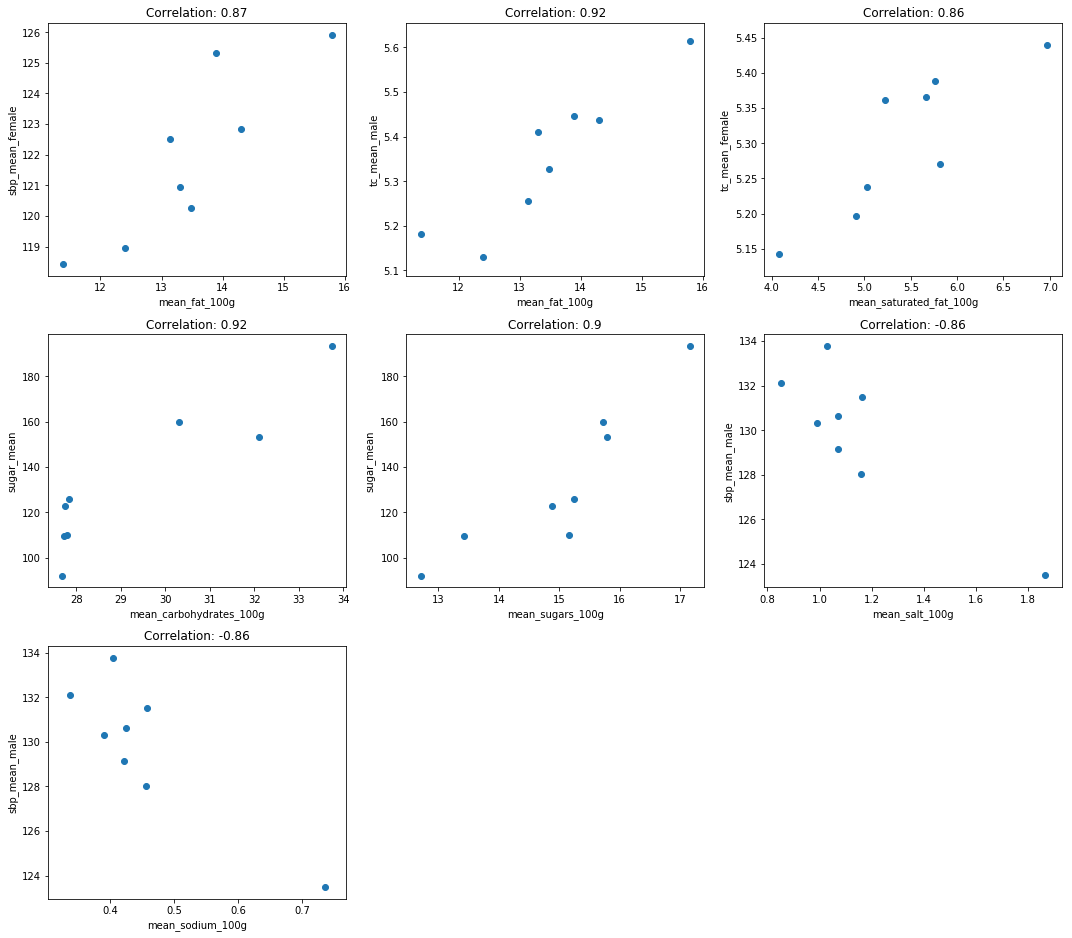

In [69]:
plot_scatter_plots(final_corr_dict, countries_mean_dataset)

And... very disappointing. The correlations do not look very convincing. Furthermore the countries represented are only 8 and the Law of large numbers is not working here. Let's explore the correlations anyway:

1. The first three correlations are all related to fat content in foods. The all look somewhat good but they all have one outlier in the top right corner. And this outlier is Germany. Let's see what will happen with our coefficient if we remove Germany from the equation

In [70]:
print(countries_mean_dataset[countries_mean_dataset.index != "Germany"]["mean_fat_100g"].corr(
    countries_mean_dataset[countries_mean_dataset.index != "Germany"]["sbp_mean_female"]))

print(countries_mean_dataset[countries_mean_dataset.index != "Germany"]["mean_fat_100g"].corr(
    countries_mean_dataset[countries_mean_dataset.index != "Germany"]["tc_mean_male"]))

print(countries_mean_dataset[countries_mean_dataset.index != "Germany"]["mean_saturated_fat_100g"].corr(
    countries_mean_dataset[countries_mean_dataset.index != "Germany"]["tc_mean_female"]))

0.7892389247761539
0.8489440489992426
0.809199509421075


They remain correlated, but with a weaker coefficient. This is not totally bad.

2. The fourth correlation between mean_carbohydrates_100g and sugar_mean doesn't look good. We have a "column" of dots in the beginning and then 3 outliers. There might be a correlation here, but more data is needed to prove it. We cannot rely on 3 dots to form conclusoins.

3. The fifth correlation between mean_sugars_100g in food and sugar_mean consumption by people is the best so far. We have a dot that is off by little but if we remove any other dot, we will still remain correlated.

4. The sixth and seventh "correlations" are fake. We have a cluster of dots and then one single outlier that gives the impression of some kind of correlation. This outlier however is United States and we cannot remove it. To prove my point we can see that without United States, there is no significant correlation.

In [71]:
print(countries_mean_dataset[countries_mean_dataset.index != "United States"]["mean_salt_100g"].corr(
    countries_mean_dataset[countries_mean_dataset.index != "United States"]["sbp_mean_male"]))
print(countries_mean_dataset[countries_mean_dataset.index != "United States"]["mean_sodium_100g"].corr(
    countries_mean_dataset[countries_mean_dataset.index != "United States"]["sbp_mean_male"]))

-0.45596897437722317
-0.4564685243987916


We dropped from almost -0.9 to -0.45. Shame.

### Final conclusions

The Open Food Facts dataset statistically is very unrewarding. First of all we have very few countries with good product representation. The rest have few products listed and cannot be used for statistical purposes. So instead of analyzing 30 or more countries like I hoped in the beginning, I was forced to analyze only 8 and the Law of large numbers is not in effect for such a small sample of countries. Furthermore a lot of product information is missing or incorrect and we have a lot of non-existing or wrong values everywhere. Having in mind those limitations, we can draw the following conclusions based on the data that was available:

1. The food products available in different countries have different distribution of macronutrients. This means that there are countries which sell more sugar-rich products in general and countries which sell more fat-rich products in general.
2. We cannot confirm with certainty whether the different distribution of food product macronutrients among the different countries has direct effect on the health of the people living in those countries, but there are several key factors that are worth investigating further:
    - the relation between fat content in food and cholesterol levels in blood
    - the relation between fat content in food and blood pressure especially in female individuals
3. We, as people,  consume more sugar in general if we live in a country where more sugar-rich food products are sold, but this is somewhat obvious.

And finally **Correlation does not imply causation!** Even if we succeed in finding a strong correlation between fat in food, cholesterol levels in blood and blood pressure, that does not mean that fatty foods cause high blood pressure. That simply means that we need to investigate more in this direction and include other information like behavioral factors, genetics, bad habits, stress, etc. But this will be a topic for another research paper.

### References 

* [Open Food Facts database](https://world.openfoodfacts.org/)
* [Gampinder datasets on human body health indicators](https://www.gapminder.org/)